<a href="https://colab.research.google.com/github/ge43jef/GEEHYDRO/blob/perfectdatacodes/task1_2extra97r0ws.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
%matplotlib inline
##plots be directly displayed below the code

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Read the data from the text file
var = pd.read_csv('/content/task197values.csv')
var

,system:index,201001_temperature_2m,201001_total_precipitation_sum,201002_temperature_2m,201002_total_precipitation_sum,201003_temperature_2m,201003_total_precipitation_sum,201004_temperature_2m,201004_total_precipitation_sum,201005_temperature_2m,...,201008_total_precipitation_sum,201009_temperature_2m,201009_total_precipitation_sum,201010_temperature_2m,201010_total_precipitation_sum,201011_temperature_2m,201011_total_precipitation_sum,201012_temperature_2m,201012_total_precipitation_sum,.geo
0,00000000000000000000_0,277.115203,0.264476,277.213594,0.163854,278.261991,0.169239,278.310289,0.233403,282.090357,...,0.002362,291.522381,0.002237,286.101813,0.195685,278.748204,0.218712,276.469184,0.415406,"{""type"":""MultiPoint"",""coordinates"":[]}"
1,00000000000000000000_1,281.511590,0.276352,282.501625,0.128091,283.561271,0.099855,284.388560,0.161121,287.833387,...,0.001014,295.863253,0.002042,290.845994,0.116669,283.364008,0.136109,281.960678,0.301903,"{""type"":""MultiPoint"",""coordinates"":[]}"
2,00000000000000000000_2,281.190857,0.287895,282.030468,0.142683,283.078350,0.113902,283.752794,0.181628,287.128716,...,0.001070,295.447967,0.001365,290.380509,0.126866,282.902026,0.153804,281.528801,0.336193,"{""type"":""MultiPoint"",""coordinates"":[]}"
3,00000000000000000000_3,280.646209,0.290189,281.352519,0.152121,282.397996,0.126874,282.882102,0.197505,286.216297,...,0.001205,294.795550,0.001042,289.676447,0.140401,282.275990,0.169628,280.879747,0.361253,"{""type"":""MultiPoint"",""coordinates"":[]}"
4,00000000000000000000_4,279.782090,0.280420,280.363877,0.155143,281.429742,0.139830,281.733203,0.208290,285.096818,...,0.001513,293.901814,0.001209,288.697257,0.159178,281.330859,0.183874,279.903431,0.374184,"{""type"":""MultiPoint"",""coordinates"":[]}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,00000000000000000000_91,282.099557,0.210923,283.595872,0.092239,284.811289,0.057196,285.861838,0.076362,289.470615,...,0.001555,295.276439,0.000290,291.360857,0.066236,284.924232,0.067803,283.021364,0.157005,"{""type"":""MultiPoint"",""coordinates"":[]}"
92,00000000000000000000_92,282.141255,0.210994,283.649589,0.095984,284.785857,0.059333,285.810514,0.081272,289.498594,...,0.002015,295.442767,0.000252,291.411644,0.072243,284.695103,0.073778,283.049170,0.163936,"{""type"":""MultiPoint"",""coordinates"":[]}"
93,00000000000000000000_93,282.165210,0.213074,283.659200,0.099971,284.741460,0.061915,285.732804,0.087435,289.391776,...,0.002161,295.552717,0.000212,291.350900,0.079877,284.409801,0.080396,283.052585,0.172966,"{""type"":""MultiPoint"",""coordinates"":[]}"
94,00000000000000000000_94,282.165210,0.213074,283.659200,0.099971,284.741460,0.061915,285.732804,0.087435,289.391776,...,0.002161,295.552717,0.000212,291.350900,0.079877,284.409801,0.080396,283.052585,0.172966,"{""type"":""MultiPoint"",""coordinates"":[]}"


In [5]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('/content/task197values.csv')


In [15]:
# Select columns with specific ending patterns
temperature_columns = [col for col in df.columns if col.endswith('temperature_2m')]
precipitation_columns = [col for col in df.columns if col.endswith('total_precipitation_sum')]

# Create new DataFrames with selected columns
temperature_mean = df[temperature_columns].mean(axis=1)
precipitation_mean = df[precipitation_columns].mean(axis=1)
var =
var

0     283.915335
1     288.586030
2     288.155790
3     287.507739
4     286.598111
         ...    
91    288.718885
92    288.797993
93    288.816003
94    288.816003
95    288.751331
Length: 96, dtype: float64

In [18]:
var = pd.DataFrame({'temperature_mean': temperature_mean, 'precipitation_mean': precipitation_mean})
var

,temperature_mean,precipitation_mean
0,283.766286,0.149048
1,288.479329,0.106701
2,288.037966,0.117824
3,287.381009,0.126730
4,286.464947,0.133164
...,...,...
91,288.656107,0.062778
92,288.732602,0.065392
93,288.747231,0.068772
94,288.747231,0.068772


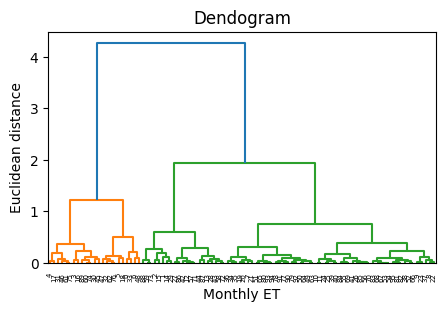

In [23]:
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(5,3))
# Scaling the variables have large diff.
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(var)

## to find the optimum cluster
dendogram = sch.dendrogram(sch.linkage(scaled_data, method ="ward"))
plt.title("Dendogram")
plt.xlabel("Monthly ET")
plt.ylabel("Euclidean distance")
plt.show()
##scaled_data
##var

In [ ]:
from scipy.spatial.distance import euclidean
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cl = cluster.fit_predict(scaled_data)
cl


In [53]:
from sklearn.metrics import silhouette_score
silhouette_score(scaled_data,cl)

0.5503047609416187

In [46]:
# Get the unique cluster labels
unique_cl = np.unique(cl)
unique_cl

array([0, 1, 2, 3])

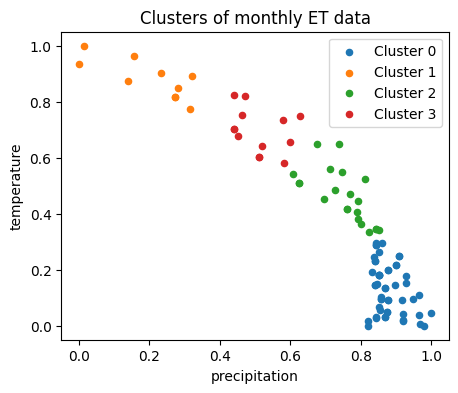

In [67]:
# Plot each cluster
plt.figure(figsize=(5, 4))
for label in unique_cl:
    plt.scatter(scaled_data[cl == label, 0], scaled_data[cl == label, 1], s=20, label=f'Cluster {label}')

plt.xlabel("Temprature")
plt.ylabel("Precipitation")
plt.title("Clusters of monthly ET data")
plt.legend()
plt.show()

**DBSCAN Clustering**

In [175]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=3)
nbrs = neigh.fit(scaled_data)
dist, indices = nbrs.kneighbors(scaled_data)

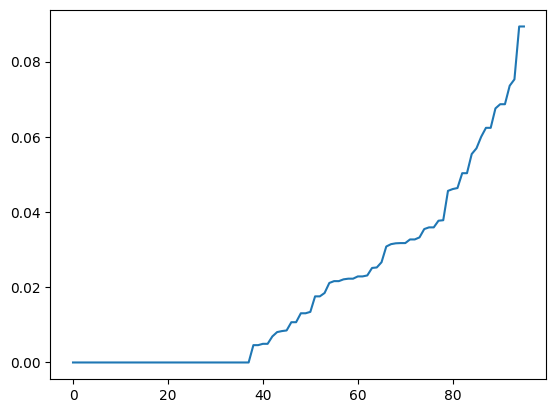

In [176]:
dist = np.sort(dist, axis=0)
dist = dist[:,1]
plt.plot(dist)

In [207]:
from sklearn.cluster import DBSCAN
dbscancluster =DBSCAN(eps=0.085, min_samples=3)
dbscancluster.fit(scaled_data)
cluster = dbscancluster.labels_
cluster

array([-1,  0,  1,  1,  1,  2, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
        1,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  2, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  2, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  2,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  1,  1,  1,  2,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0])

In [208]:
silhouette_score(scaled_data, cluster)

0.5611990579955044

In [209]:
unique_cl = np.unique(cluster)
unique_cl

array([-1,  0,  1,  2])

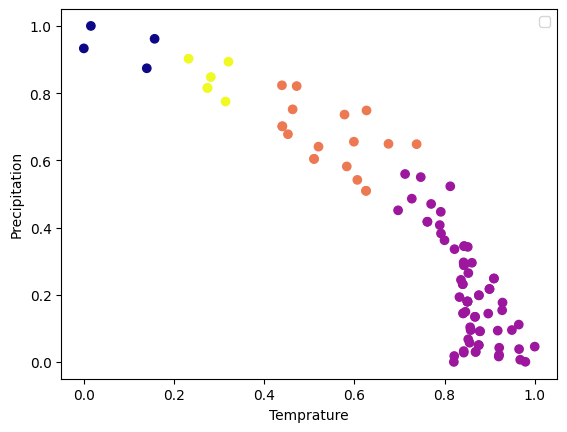

In [210]:
# Plot the clusters
plt.scatter(scaled_data[:, 0], scaled_data[:,1], c = cluster, cmap= "plasma") # plotting the clusters
plt.xlabel("Temprature") # X-axis label
plt.ylabel("Precipitation") # Y-axis label
plt.legend()
plt.show() # showing the plot
